<a href="https://colab.research.google.com/github/jai8004/Data-Science/blob/main/DeepLearning/Basics/Basics_Pytorch_Model_Building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression using Pytorch


In [10]:
#%% packages
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import seaborn as sns

In [11]:
#%% data import
cars_file = 'https://gist.githubusercontent.com/noamross/e5d3e859aa0c794be10b/raw/b999fb4425b54c63cab088c0ce2c0d6ce961a563/cars.csv'
cars = pd.read_csv(cars_file)
cars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [12]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  32 non-null     object 
 1   mpg         32 non-null     float64
 2   cyl         32 non-null     int64  
 3   disp        32 non-null     float64
 4   hp          32 non-null     int64  
 5   drat        32 non-null     float64
 6   wt          32 non-null     float64
 7   qsec        32 non-null     float64
 8   vs          32 non-null     int64  
 9   am          32 non-null     int64  
 10  gear        32 non-null     int64  
 11  carb        32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [13]:
cars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


<Axes: xlabel='wt', ylabel='mpg'>

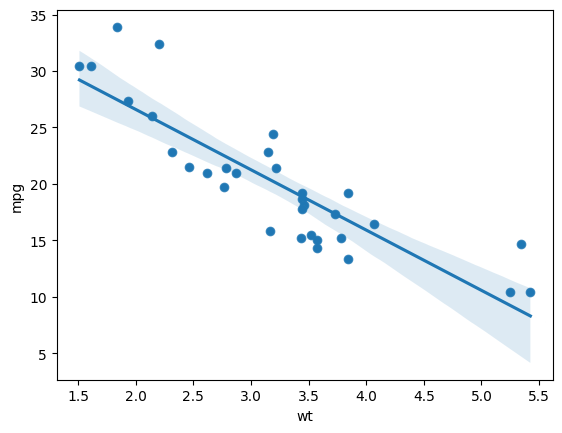

In [14]:
#%% visualize the model
#replicating regessrion line with the model
sns.scatterplot(x='wt',y='mpg',data=cars)
sns.regplot(x='wt',y='mpg',data=cars)

### Basic Regression Model Implementation

In [30]:
# convert data to tensors
X_list = cars.wt.values
X_np = np.array(X_list,dtype=np.float32).reshape(-1,1)
y_list = cars.mpg.values.tolist()
y_np = np.array(y_list,dtype=np.float32).reshape(-1,1)
X = torch.from_numpy(X_np)
y = torch.tensor(y_list)

In [31]:
# setting up weights and biases
w = torch.rand(1,requires_grad=True, dtype = torch.float64)
b = torch.rand(1,requires_grad=True, dtype=torch.float64)

In [33]:
#setting up epochs and learning rate
num_epochs = 200
learning_rate = 2e-3

In [34]:
#training model
for epioch in range(num_epochs):
  for i in range(len(X)):
    #forward pass
    y_preidct = X[i]*w+b
    #calculate the loss
    loss_tensor = torch.pow(y_preidct - y[i],2)
    #backward pass
    loss_tensor.backward()
    #extract loss
    loss_value = loss_tensor.data[0]
    #update weights and biases
    with torch.no_grad():
      w-=w.grad*learning_rate
      b -= b.grad*learning_rate
      w.grad.zero_()
      b.grad.zero_()
  print(loss_value)

tensor(81.0647, dtype=torch.float64)
tensor(41.9548, dtype=torch.float64)
tensor(35.0787, dtype=torch.float64)
tensor(33.1883, dtype=torch.float64)
tensor(32.2369, dtype=torch.float64)
tensor(31.4801, dtype=torch.float64)
tensor(30.7733, dtype=torch.float64)
tensor(30.0879, dtype=torch.float64)
tensor(29.4182, dtype=torch.float64)
tensor(28.7627, dtype=torch.float64)
tensor(28.1209, dtype=torch.float64)
tensor(27.4924, dtype=torch.float64)
tensor(26.8772, dtype=torch.float64)
tensor(26.2747, dtype=torch.float64)
tensor(25.6849, dtype=torch.float64)
tensor(25.1074, dtype=torch.float64)
tensor(24.5420, dtype=torch.float64)
tensor(23.9885, dtype=torch.float64)
tensor(23.4466, dtype=torch.float64)
tensor(22.9160, dtype=torch.float64)
tensor(22.3966, dtype=torch.float64)
tensor(21.8882, dtype=torch.float64)
tensor(21.3904, dtype=torch.float64)
tensor(20.9032, dtype=torch.float64)
tensor(20.4262, dtype=torch.float64)
tensor(19.9593, dtype=torch.float64)
tensor(19.5023, dtype=torch.float64)
t

Weight: -3.8575179884463795, Bias: 31.980193584941883


<Axes: >

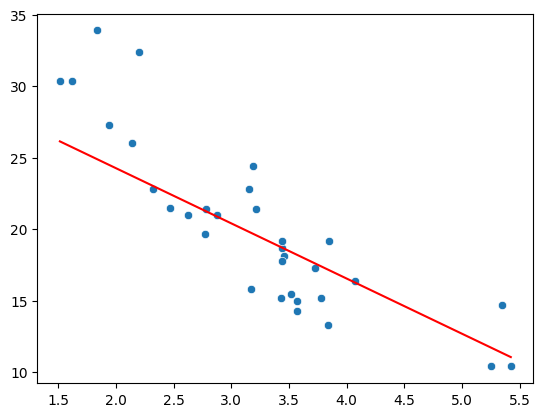

In [35]:
# check results
print(f"Weight: {w.item()}, Bias: {b.item()}")
y_pred = (torch.tensor(X_list)*w+b).detach().numpy()
sns.scatterplot(x=X_list, y=y_list)
sns.lineplot(x=X_list, y=y_pred, color='red')


In [36]:
# %% (Statistical) Linear Regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_np, y_list)
print(f"Slope: {reg.coef_}, Bias: {reg.intercept_}")

Slope: [-5.3444715], Bias: 37.285125732421875


### Visualise Neural Network

In [41]:
# !apt install libgraphviz-dev
# !pip install pygraphviz
# ! pip install torchviz

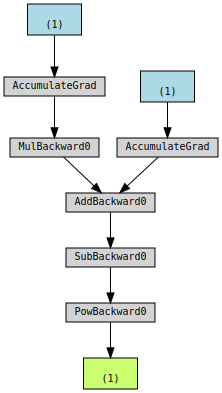

In [40]:
import os
from torchviz import make_dot
make_dot(loss_tensor)